In [1]:
import pandas as pd

training_data_34_66_path = '/data/notebook_files/training_data_34_66.csv'
training_data_10_90_path = '/data/notebook_files/training_data_10_90.csv'
X_test_path = '/data/notebook_files/X_test.csv'
y_test_path = '/data/notebook_files/y_test.csv'

training_data_34_66 = pd.read_csv(training_data_34_66_path)
training_data_10_90 = pd.read_csv(training_data_10_90_path)
X_test = pd.read_csv(X_test_path)
y_test = pd.read_csv(y_test_path)

# Logistic Regression of the 34:66 Class Distribution 

In [3]:
X_train_34_66 = training_data_34_66.drop('Class', axis=1)
y_train_34_66 = training_data_34_66['Class']

y_test = y_test.squeeze()  # This will convert y_test to a Series if it's a single-column DataFrame

Accuracy (34:66): 0.9918191074751589
Recall/Sensitivity (34:66): 0.8979591836734694
Specificity (34:66): 0.9919808666291503
Precision (34:66): 0.16176470588235295
F2 Score (34:66): 0.47008547008547
Matthews Correlation Coefficient (MCC) (34:66): 0.3792138579268492
Balanced Classification Rate (BCR) (34:66): 0.9449700251513098
ROC AUC (34:66): 0.9789443914876024
Confusion Matrix (34:66):
[[56408   456]
 [   10    88]]
TN (34:66): 56408, FP (34:66): 456, FN (34:66): 10, TP (34:66): 88


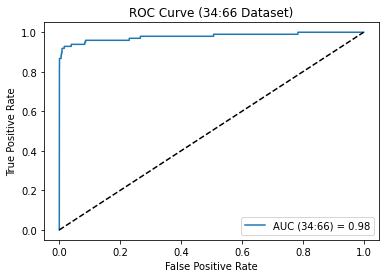

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, precision_score, fbeta_score,
                             roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef)
import matplotlib.pyplot as plt

X_train_34_66 = training_data_34_66.drop('Class', axis=1)
y_train_34_66 = training_data_34_66['Class']

# Initialize the Logistic Regression classifier
lr_model_34_66 = LogisticRegression(max_iter=1000)  # Increase max_iter if the model doesn't converge

# Train the model on the 34:66 resampled training data
lr_model_34_66.fit(X_train_34_66, y_train_34_66)

# Predict on the test set
y_pred_34_66 = lr_model_34_66.predict(X_test)
y_pred_proba_34_66 = lr_model_34_66.predict_proba(X_test)[:, 1]  

# Calculate evaluation metrics
accuracy_34_66 = accuracy_score(y_test, y_pred_34_66)
recall_34_66 = recall_score(y_test, y_pred_34_66)
precision_34_66 = precision_score(y_test, y_pred_34_66)
f2_score_34_66 = fbeta_score(y_test, y_pred_34_66, beta=2)  
roc_auc_34_66 = roc_auc_score(y_test, y_pred_proba_34_66)
conf_matrix_34_66 = confusion_matrix(y_test, y_pred_34_66)
mcc_34_66 = matthews_corrcoef(y_test, y_pred_34_66)

# Extracting TN, FP, FN, TP from confusion matrix
tn_34_66, fp_34_66, fn_34_66, tp_34_66 = conf_matrix_34_66.ravel()

# Specificity or True Negative Rate
specificity_34_66 = tn_34_66 / (tn_34_66 + fp_34_66)

# Balanced Classification Rate (BCR)
bcr_34_66 = (recall_34_66 + specificity_34_66) / 2

# Print the metrics
print(f'Accuracy (34:66): {accuracy_34_66}')
print(f'Recall/Sensitivity (34:66): {recall_34_66}')
print(f'Specificity (34:66): {specificity_34_66}')
print(f'Precision (34:66): {precision_34_66}')
print(f'F2 Score (34:66): {f2_score_34_66}')
print(f'Matthews Correlation Coefficient (MCC) (34:66): {mcc_34_66}')
print(f'Balanced Classification Rate (BCR) (34:66): {bcr_34_66}')
print(f'ROC AUC (34:66): {roc_auc_34_66}')
print(f'Confusion Matrix (34:66):\n{conf_matrix_34_66}')
print(f'TN (34:66): {tn_34_66}, FP (34:66): {fp_34_66}, FN (34:66): {fn_34_66}, TP (34:66): {tp_34_66}')

# ROC Curve
fpr_34_66, tpr_34_66, _ = roc_curve(y_test, y_pred_proba_34_66)
plt.plot(fpr_34_66, tpr_34_66, label=f'AUC (34:66) = {roc_auc_34_66:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (34:66 Dataset)')
plt.legend(loc='lower right')
plt.show()

# Cross-Validating Logistic Regression for the 34:66 Class Distribution

In [6]:
import numpy as np
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef

# Initialize the Logistic Regression classifier
lr_model = LogisticRegression(max_iter=1000)

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results = cross_validate(lr_model, X_train_34_66, y_train_34_66, cv=cv_strategy, scoring=scoring)

accuracy_scores = cv_results['test_accuracy']
recall_scores = cv_results['test_recall']
precision_scores = cv_results['test_precision']
f2_scores = cv_results['test_f2_score']
mcc_scores = cv_results['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy: {np.mean(accuracy_scores)} (+/- {np.std(accuracy_scores)})')
print(f'Cross-validated recall: {np.mean(recall_scores)} (+/- {np.std(recall_scores)})')
print(f'Cross-validated precision: {np.mean(precision_scores)} (+/- {np.std(precision_scores)})')
print(f'Cross-validated F2 score: {np.mean(f2_scores)} (+/- {np.std(f2_scores)})')
print(f'Cross-validated MCC: {np.mean(mcc_scores)} (+/- {np.std(mcc_scores)})')

Cross-validated accuracy: 0.9646632694512421 (+/- 0.00037477596348699677)
Cross-validated recall: 0.883917626219573 (+/- 0.0010275029392828772)
Cross-validated precision: 0.9744403186686881 (+/- 0.0007676127672420217)
Cross-validated F2 score: 0.9006510532003231 (+/- 0.0009217433488525385)
Cross-validated MCC: 0.9056083416937042 (+/- 0.0010185997245098501)


# Logistic Regression of the 10:90 Class Distribution 

In [8]:
X_train_10_90 = training_data_10_90.drop('Class', axis=1)
y_train_10_90 = training_data_10_90['Class']

y_test = y_test.squeeze()  

Accuracy (10:90) - Logistic Regression: 0.9978582212703205
Recall/Sensitivity (10:90) - Logistic Regression: 0.8673469387755102
Specificity (10:90) - Logistic Regression: 0.9980831457512662
Precision (10:90) - Logistic Regression: 0.4381443298969072
F2 Score (10:90) - Logistic Regression: 0.7252559726962458
Matthews Correlation Coefficient (MCC) (10:90) - Logistic Regression: 0.6156176565181405
Balanced Classification Rate (BCR) (10:90) - Logistic Regression: 0.9327150422633882
ROC AUC (10:90) - Logistic Regression: 0.9792623718029699
Confusion Matrix (10:90) - Logistic Regression:
[[56755   109]
 [   13    85]]
TN (10:90): 56755, FP (10:90): 109, FN (10:90): 13, TP (10:90): 85


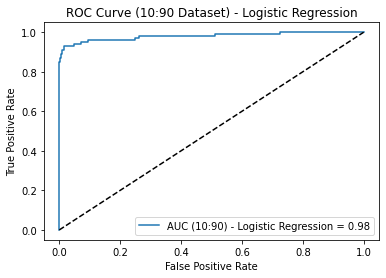

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, precision_score, fbeta_score, 
                             roc_curve, roc_auc_score, confusion_matrix, matthews_corrcoef)
import matplotlib.pyplot as plt

# Initialize the Logistic Regression classifier
lr_model_10_90 = LogisticRegression()

# Train the model on the 10:90 resampled training data
lr_model_10_90.fit(X_train_10_90, y_train_10_90)

# Predict on the test set
y_pred_10_90_lr = lr_model_10_90.predict(X_test)
y_pred_proba_10_90_lr = lr_model_10_90.predict_proba(X_test)[:, 1]  

# Calculate evaluation metrics
accuracy_10_90_lr = accuracy_score(y_test, y_pred_10_90_lr)
recall_10_90_lr = recall_score(y_test, y_pred_10_90_lr)
precision_10_90_lr = precision_score(y_test, y_pred_10_90_lr)
f2_score_10_90_lr = fbeta_score(y_test, y_pred_10_90_lr, beta=2)
roc_auc_10_90_lr = roc_auc_score(y_test, y_pred_proba_10_90_lr)
conf_matrix_10_90_lr = confusion_matrix(y_test, y_pred_10_90_lr)
mcc_10_90_lr = matthews_corrcoef(y_test, y_pred_10_90_lr)

# Extracting TN, FP, FN, TP from confusion matrix
tn_10_90_lr, fp_10_90_lr, fn_10_90_lr, tp_10_90_lr = conf_matrix_10_90_lr.ravel()

# Specificity or True Negative Rate
specificity_10_90_lr = tn_10_90_lr / (tn_10_90_lr + fp_10_90_lr)

# Balanced Classification Rate (BCR) 
bcr_10_90_lr = (recall_10_90_lr + specificity_10_90_lr) / 2

# Print the metrics
print(f'Accuracy (10:90) - Logistic Regression: {accuracy_10_90_lr}')
print(f'Recall/Sensitivity (10:90) - Logistic Regression: {recall_10_90_lr}')
print(f'Specificity (10:90) - Logistic Regression: {specificity_10_90_lr}')
print(f'Precision (10:90) - Logistic Regression: {precision_10_90_lr}')
print(f'F2 Score (10:90) - Logistic Regression: {f2_score_10_90_lr}')
print(f'Matthews Correlation Coefficient (MCC) (10:90) - Logistic Regression: {mcc_10_90_lr}')
print(f'Balanced Classification Rate (BCR) (10:90) - Logistic Regression: {bcr_10_90_lr}')
print(f'ROC AUC (10:90) - Logistic Regression: {roc_auc_10_90_lr}')
print(f'Confusion Matrix (10:90) - Logistic Regression:\n{conf_matrix_10_90_lr}')
print(f'TN (10:90): {tn_10_90_lr}, FP (10:90): {fp_10_90_lr}, FN (10:90): {fn_10_90_lr}, TP (10:90): {tp_10_90_lr}')

# ROC Curve
fpr_10_90_lr, tpr_10_90_lr, _ = roc_curve(y_test, y_pred_proba_10_90_lr)
plt.plot(fpr_10_90_lr, tpr_10_90_lr, label=f'AUC (10:90) - Logistic Regression = {roc_auc_10_90_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (10:90 Dataset) - Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Cross-Validation of Logistic Regression Models in 10:90 Class Distribution

In [10]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, fbeta_score, matthews_corrcoef
import numpy as np

# Initialize the Logistic Regression classifier
lr_model_10_90 = LogisticRegression(max_iter=1000)

# Define the cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

# Define scoring functions for cross-validation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score),
    'f2_score': make_scorer(fbeta_score, beta=2),
    'mcc': make_scorer(matthews_corrcoef)
}

# Perform cross-validation
cv_results_10_90 = cross_validate(lr_model_10_90, X_train_10_90, y_train_10_90, cv=cv_strategy, scoring=scoring)

accuracy_scores_10_90 = cv_results_10_90['test_accuracy']
recall_scores_10_90 = cv_results_10_90['test_recall']
precision_scores_10_90 = cv_results_10_90['test_precision']
f2_scores_10_90 = cv_results_10_90['test_f2_score']
mcc_scores_10_90 = cv_results_10_90['test_mcc']

# Print the mean and standard deviation of the scores for each metric
print(f'Cross-validated accuracy (10:90): {np.mean(accuracy_scores_10_90)} (+/- {np.std(accuracy_scores_10_90)})')
print(f'Cross-validated recall (10:90): {np.mean(recall_scores_10_90)} (+/- {np.std(recall_scores_10_90)})')
print(f'Cross-validated precision (10:90): {np.mean(precision_scores_10_90)} (+/- {np.std(precision_scores_10_90)})')
print(f'Cross-validated F2 score (10:90): {np.mean(f2_scores_10_90)} (+/- {np.std(f2_scores_10_90)})')
print(f'Cross-validated MCC (10:90): {np.mean(mcc_scores_10_90)} (+/- {np.std(mcc_scores_10_90)})')

Cross-validated accuracy (10:90): 0.9853034632986271 (+/- 0.0004215905829323421)
Cross-validated recall (10:90): 0.8594856012310398 (+/- 0.00306942355255346)
Cross-validated precision (10:90): 0.9759893646091594 (+/- 0.0027298232938044687)
Cross-validated F2 score (10:90): 0.8805052695359015 (+/- 0.0028016201877814895)
Cross-validated MCC (10:90): 0.9082277629597278 (+/- 0.002707307407816995)
